In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
uber_urls = [
#     'https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv',
#     'https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-may14.csv',
#     'https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-jun14.csv',
#     'https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-jul14.csv',
    'https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-aug14.csv',
    'https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-sep14.csv'
]

In [5]:
df = pd.concat([
    pd.read_csv(url)
    for url in uber_urls
])
df.rename(columns={'Date/Time': 'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df.head()

,datetime,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


<IPython.core.display.Javascript object>

In [6]:
df['date'] = df.datetime.dt.date
df['hour'] = df.datetime.dt.hour
df.head()

,datetime,Lat,Lon,Base,date,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01,0


In [7]:
dfct = pd.crosstab(df.date, df.hour)
dfct.head(10)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2014-08-01,734,451,289,318,412,604,928,1307,1337,1153,...,1585,1885,2122,2242,2196,2120,1923,2035,2247,1794
2014-08-02,1328,996,645,532,407,417,464,553,719,797,...,1362,1615,1701,1756,1934,1844,1813,1938,2096,1778
2014-08-03,1543,1109,736,564,315,332,323,468,556,732,...,1274,1394,1574,1540,1304,1232,1253,1117,847,559
2014-08-04,304,165,126,308,425,691,1111,1420,1345,1022,...,1275,1424,1705,1885,1766,1572,1528,1298,953,620
2014-08-05,310,186,134,216,351,632,1007,1432,1397,1109,...,1481,1677,1965,2205,2030,1873,1933,1744,1276,741
2014-08-06,389,213,177,270,412,709,1130,1525,1461,1187,...,1456,1770,2052,2365,2164,2054,2098,2006,1547,869
2014-08-07,476,269,190,293,440,684,1055,1426,1448,1156,...,1554,1827,2134,2407,2429,2242,2305,2262,2002,1346
2014-08-08,700,404,288,363,467,640,967,1367,1355,1103,...,1357,1760,1874,2015,1978,1992,1746,1929,2001,1650
2014-08-09,1248,856,618,461,333,340,379,482,555,690,...,1254,1476,1589,1743,1819,1634,1644,1777,1957,1641


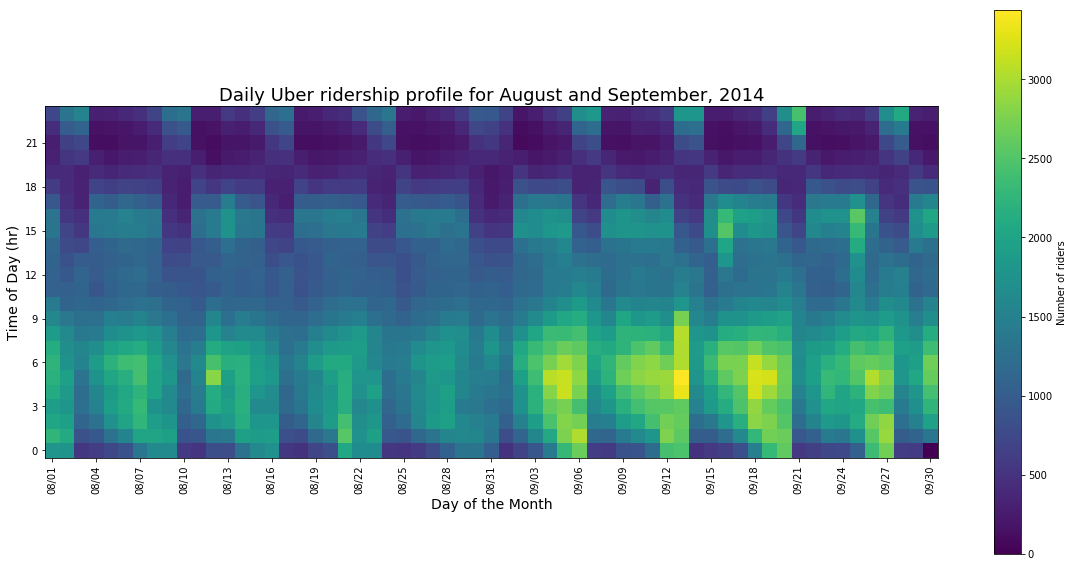

In [27]:
plt.figure(figsize=(20,10))

plt.imshow(dfct.values.T[::-1,:], cmap='viridis', origin='lower')
plt.title('Daily Uber ridership profile for August and September, 2014', fontsize=18)

plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Time of Day (hr)', fontsize=14)
# plt.xticks(range(0, dfct.values.shape[0], 2), range(1, dfct.values.shape[0]+1, 2))
plt.xticks(range(0, len(dfct), 3), [d.strftime('%m/%d') for d in dfct.index[::3]], rotation='vertical')
plt.yticks(range(0, 24, 3))
plt.colorbar().set_label('Number of riders');

**Figure 1.** Daily Uber ridership profile for the month of August and September, 2014. There is a recurring peak at around 6am, presumably for the morning commute, and another around 5pm, just in time for the evening commute. There is also weekly periodicity, where the morning and evening commute patterns exist during the week, but stop for two day periods. Additionally, weekends see their peaks leading up to midnight implying that more people are out at most likely intoxicated so they need a ride home. None of this is at all unexpected behavior.